In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
import pydotplus
sns.set()
warnings.filterwarnings("ignore")

In [2]:
t_df = pd.read_csv("titanic.csv")
t_df.shape

(891, 12)

In [3]:
# Using only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare 
# for the prediction where a passenger survived or not.
new_tdf = t_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])
new_tdf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [4]:
new_tdf.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [5]:
# as the percentage of total null values in dataset is around 19% so we can drop them.
new_tdf.dropna(inplace=True)
new_tdf.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [6]:
new_tdf.shape

(714, 7)

In [7]:
new_tdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
new_tdf.Sex[new_tdf.Sex == 'male'] = 1
new_tdf.Sex[new_tdf.Sex == 'female'] = 0
new_tdf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
889,1,1,1,26.0,0,0,30.0000


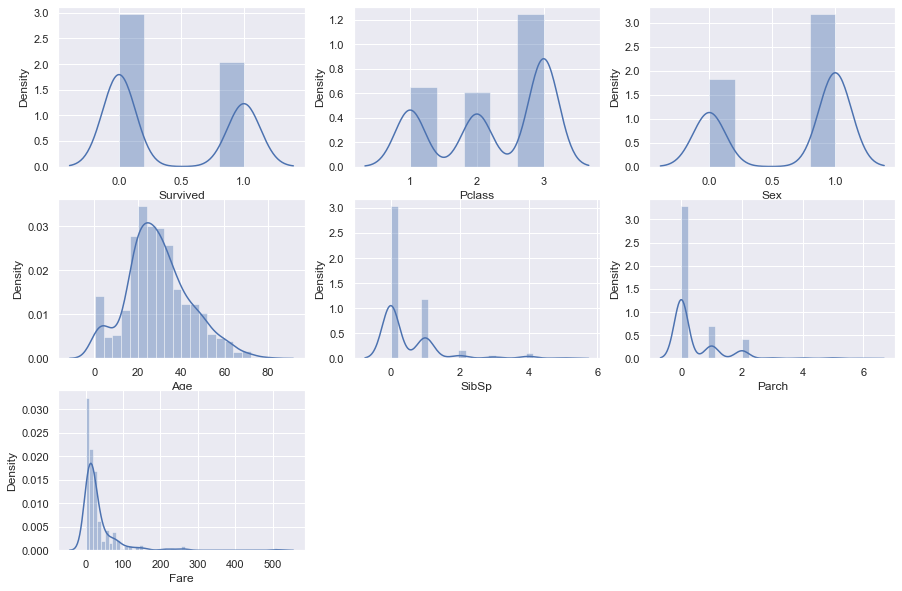

In [9]:
# check how the data is distributed
plt.figure(figsize=(15, 10))
n = 1
for col in new_tdf:
    if n <= 9:
        plt.subplot(3, 3, n)
        sns.distplot(new_tdf[col])
    n += 1
plt.show()

<AxesSubplot:>

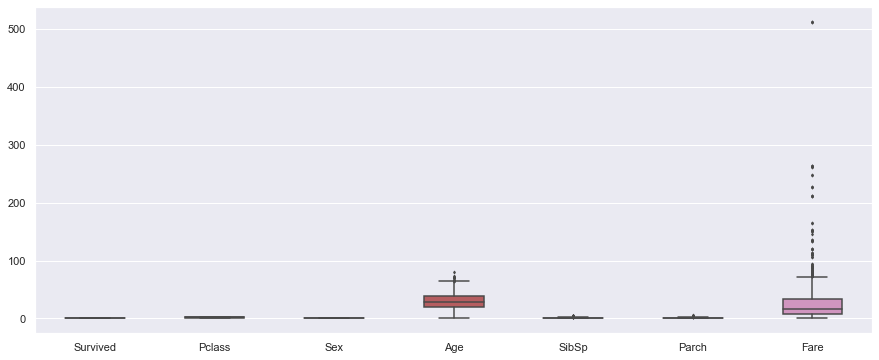

In [10]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=new_tdf, width=0.5, fliersize=2, ax=ax)

In [11]:
X = new_tdf.drop(columns=['Survived'])
y = new_tdf['Survived']

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [12]:
vif = pd.DataFrame()
vif['Vif'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Featuers'] = X.columns
vif

,Vif,Featuers
0,1.741117,Pclass
1,1.114475,Sex
2,1.310196,Age
3,1.273563,SibSp
4,1.284201,Parch
5,1.585568,Fare


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=355)

In [51]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
model.score(x_test, y_test)

0.7430167597765364

In [54]:
feature_name = list(X.columns)
class_name = list(map(lambda x: str(x), list(y.unique())))

In [55]:
dot_data = export_graphviz(model, feature_names=feature_name, class_names=class_name, rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

In [56]:
graph.write_png("DT_Titanic.png")

True

In [57]:
y_pred = model.predict(x_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7430167597765364

In [59]:
conf_mat = confusion_matrix(y_test, y_pred)

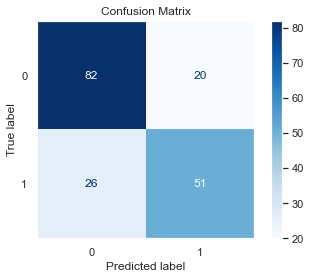

In [60]:
plot_confusion_matrix(model, x_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       102
           1       0.72      0.66      0.69        77

    accuracy                           0.74       179
   macro avg       0.74      0.73      0.74       179
weighted avg       0.74      0.74      0.74       179



In [62]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7331296154825567

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

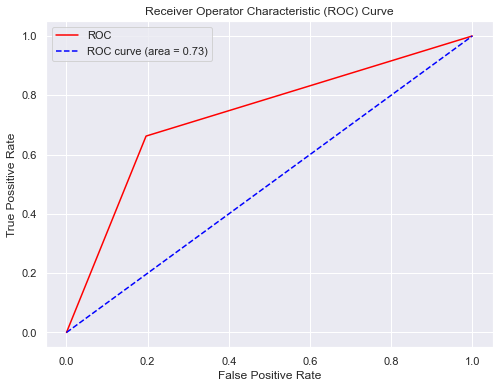

In [64]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="red", label="ROC")
plt.plot([0, 1], [ 0, 1], color='blue', linestyle="--", label="ROC curve (area = %0.2f)" %auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Possitive Rate")
plt.title("Receiver Operator Characteristic (ROC) Curve")
plt.legend()
plt.show()

### Grid Search CV

In [71]:
# tuning some hyper-parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 32, 1),
    'min_samples_leaf': range(1, 10, 1),
    'min_samples_split':range(2, 10, 1),
    'splitter' : ['best', 'random']
}

In [72]:
grid_search = GridSearchCV(model, param_grid=grid_param, cv=5, n_jobs=-1)

In [73]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [74]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [69]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=3, min_samples_split=2, splitter='best')
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3)

In [70]:
clf.score(x_test, y_test)

0.7653631284916201